In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,33808,INN33809,2,0,0,1,Meal Plan 1,0,Room_Type 1,1,2017,9,1,Online,0,0,0,105.00,0,Not_Canceled
1,845,INN00846,2,0,0,2,Meal Plan 2,0,Room_Type 1,74,2017,9,18,Offline,0,0,0,101.50,0,Not_Canceled
2,25058,INN25059,2,0,0,1,Meal Plan 1,0,Room_Type 1,42,2018,9,15,Online,0,0,0,112.59,1,Not_Canceled
3,25181,INN25182,2,0,1,0,Meal Plan 1,0,Room_Type 1,13,2018,3,20,Offline,0,0,0,85.00,0,Not_Canceled
4,16804,INN16805,2,0,1,1,Not Selected,0,Room_Type 1,27,2018,2,6,Online,0,0,0,75.00,0,Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0', 'Booking_ID'], axis= 1, inplace= True)

In [6]:
df.shape

(29020, 18)

In [7]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(7685)

In [9]:
df.drop_duplicates(inplace= True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(21335, 18)

In [12]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [26]:
df['booking_status'].value_counts(normalize= True)

booking_status
Not_Canceled    0.710991
Canceled        0.289009
Name: proportion, dtype: float64

#### Imbalanced Data

In [35]:
cat_cols = list(df.select_dtypes('object').columns)
num_cols = list(df.select_dtypes('number').columns)

In [174]:
cat_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status',
 'required_car_parking_space',
 'repeated_guest']

In [175]:
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [39]:
cat_cols.append('repeated_guest')
num_cols.remove('repeated_guest')

## DATA ANALYSIS

In [43]:
data = df.copy()

In [44]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,1,Meal Plan 1,0,Room_Type 1,1,2017,9,1,Online,0,0,0,105.00,0,Not_Canceled
1,2,0,0,2,Meal Plan 2,0,Room_Type 1,74,2017,9,18,Offline,0,0,0,101.50,0,Not_Canceled
2,2,0,0,1,Meal Plan 1,0,Room_Type 1,42,2018,9,15,Online,0,0,0,112.59,1,Not_Canceled
3,2,0,1,0,Meal Plan 1,0,Room_Type 1,13,2018,3,20,Offline,0,0,0,85.00,0,Not_Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,27,2018,2,6,Online,0,0,0,75.00,0,Canceled


## Univariate analysis

In [53]:
def num_plot_dist(df, num_features):
    fig, ax = plt.subplots(len(num_features), 2 , figsize = (15,len(num_features)*5))
    if len(num_features) == 1:
        ax = [ax]
    
    for i, column in enumerate(num_features):
        sns.histplot(data = df,x = column, ax = ax[i][0], kde =True, palette= 'Blues' )
        ax[i][0].set_title(f'Histogram for {column}')

        sns.boxplot(data = df, x = column, ax =ax[i][1], palette= "Blues")
        ax[i][1].set_title(f'Box plot for {column}')

        plt.tight_layout()
    plt.show()

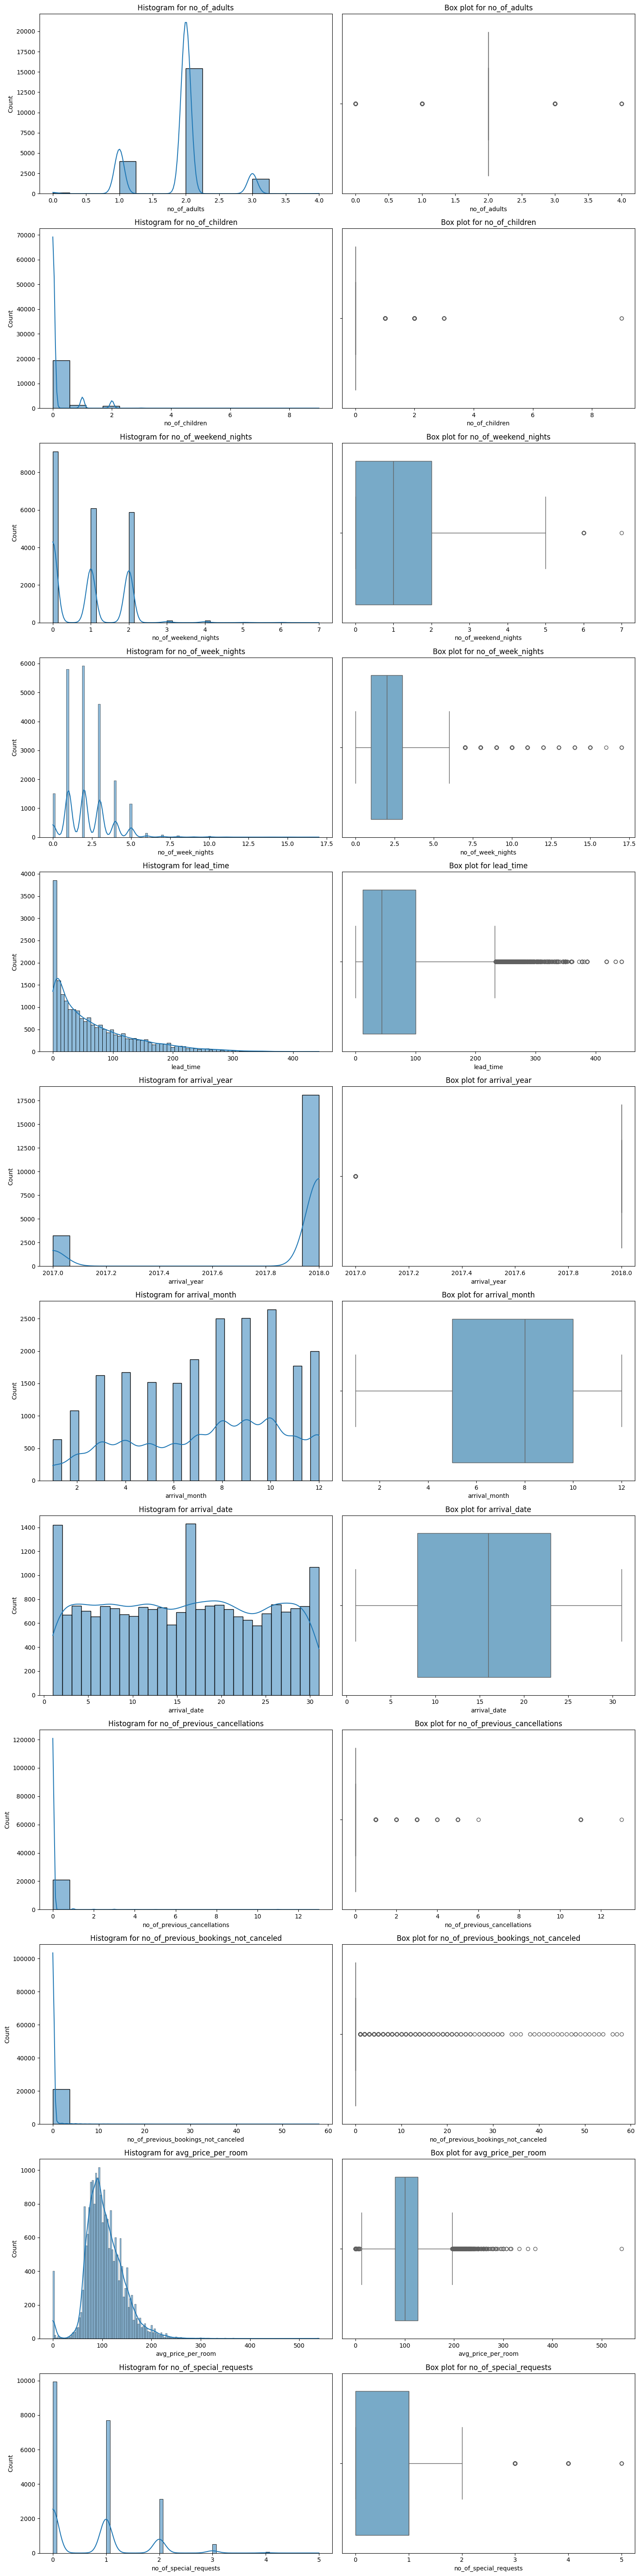

In [54]:
num_plot_dist(data, num_cols)

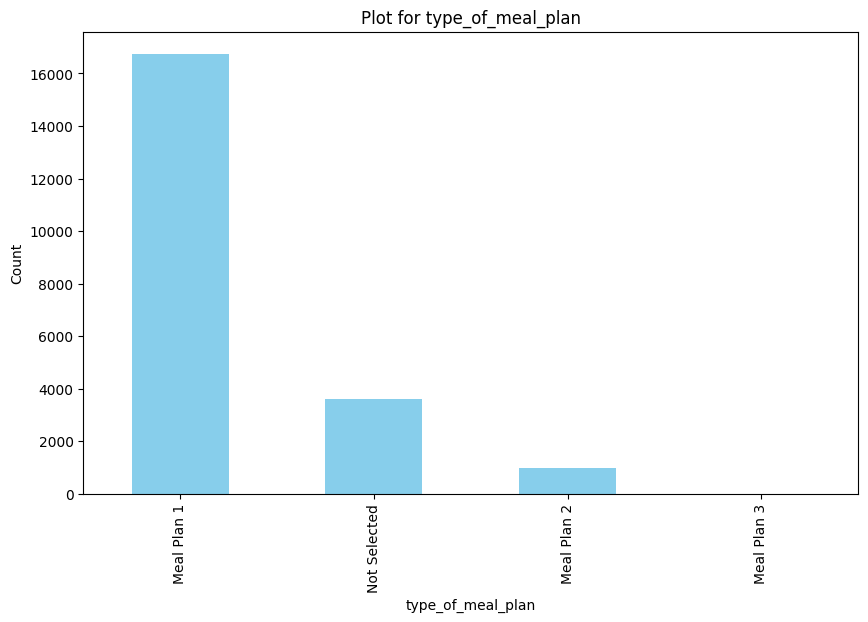

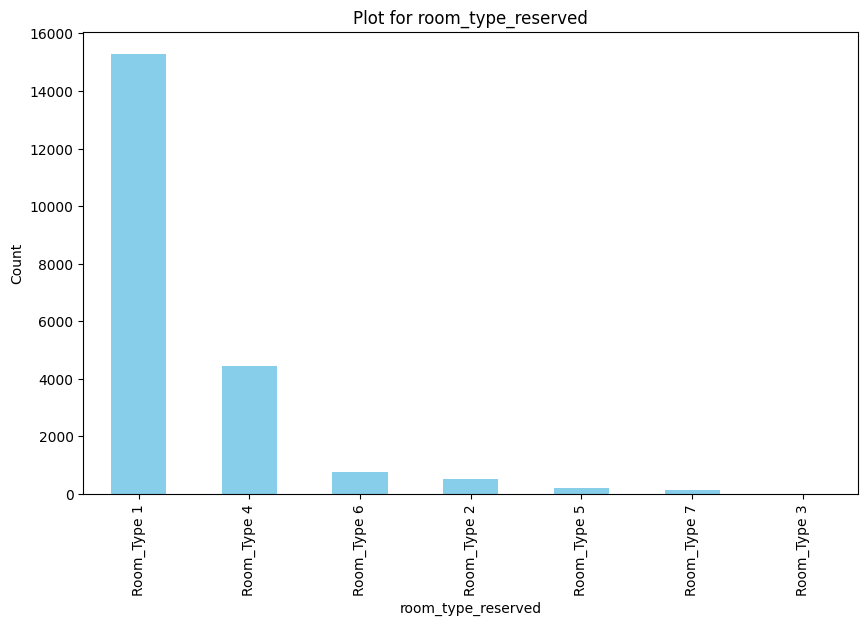

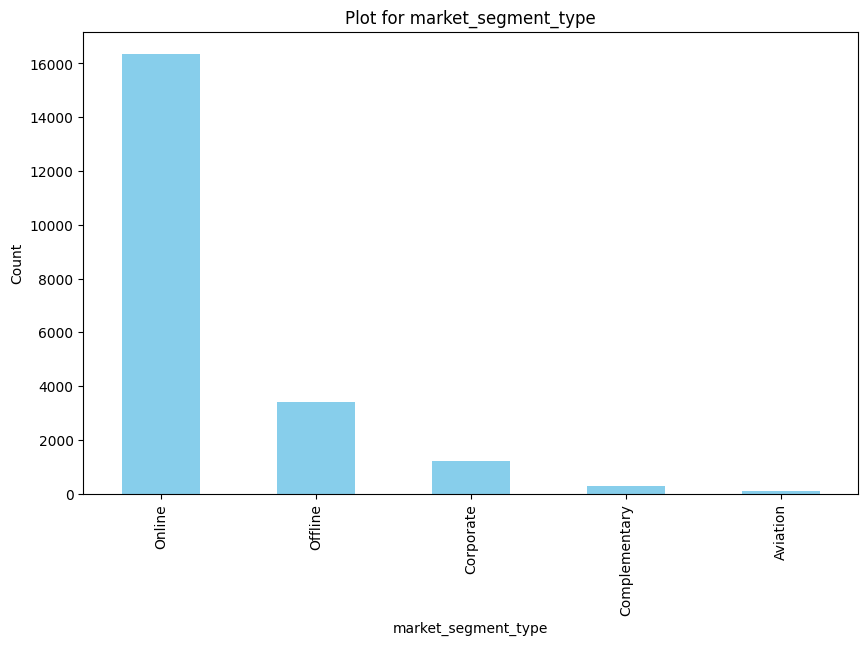

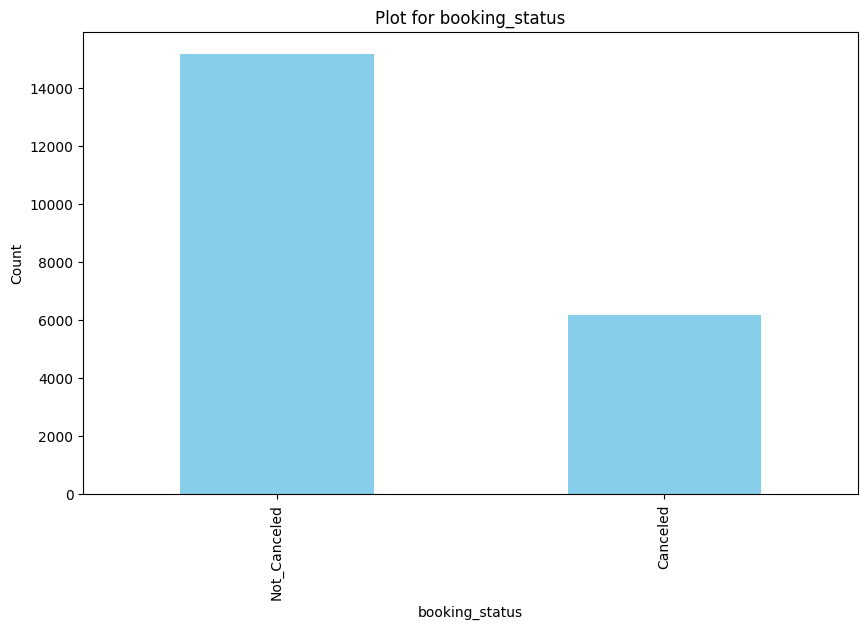

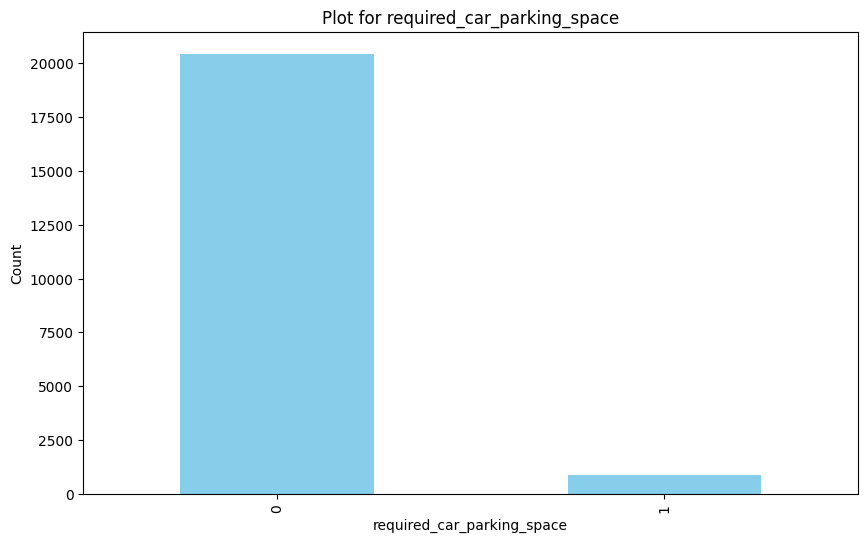

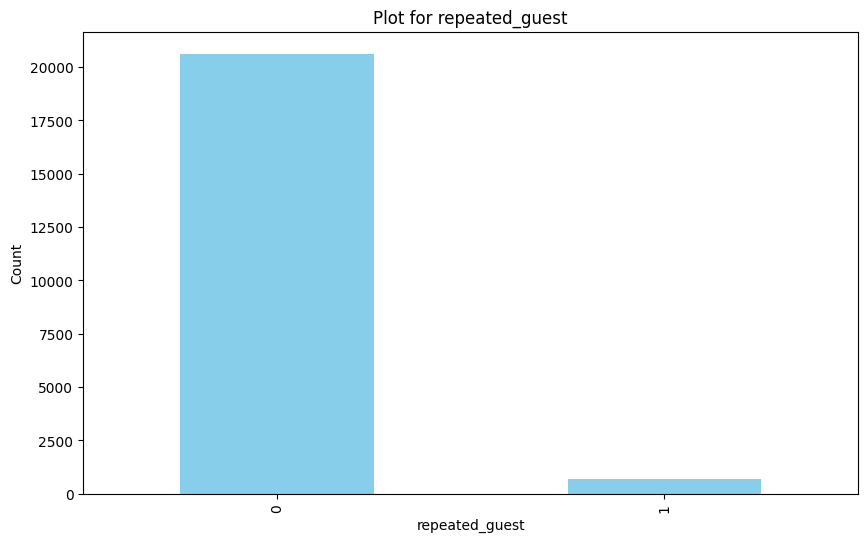

In [58]:
for cat_features in cat_cols:
    plt.figure(figsize = (10,6))
    data[cat_features].value_counts().plot(kind= 'bar', color= 'skyblue')
    plt.title(f'Plot for {cat_features}')
    plt.xlabel(cat_features)
    plt.ylabel('Count')

## Bivariate Analysis

In [59]:
def plot_bivariate_for_num(df, target, num_feature):
    num_plots = len(num_feature)
    num_rows = (num_plots + 1)//2

    fig, ax = plt.subplots(num_rows, 2, figsize = (15, num_rows*5))
    ax = ax.flatten()

    for i, columns in enumerate(num_feature):
        sns.boxplot(x = target, y = columns, ax = ax[i], data = df, palette= 'Blues')
        ax[i].set_title(f'{columns} vs {target}')
        plt.tight_layout()
    plt.show()

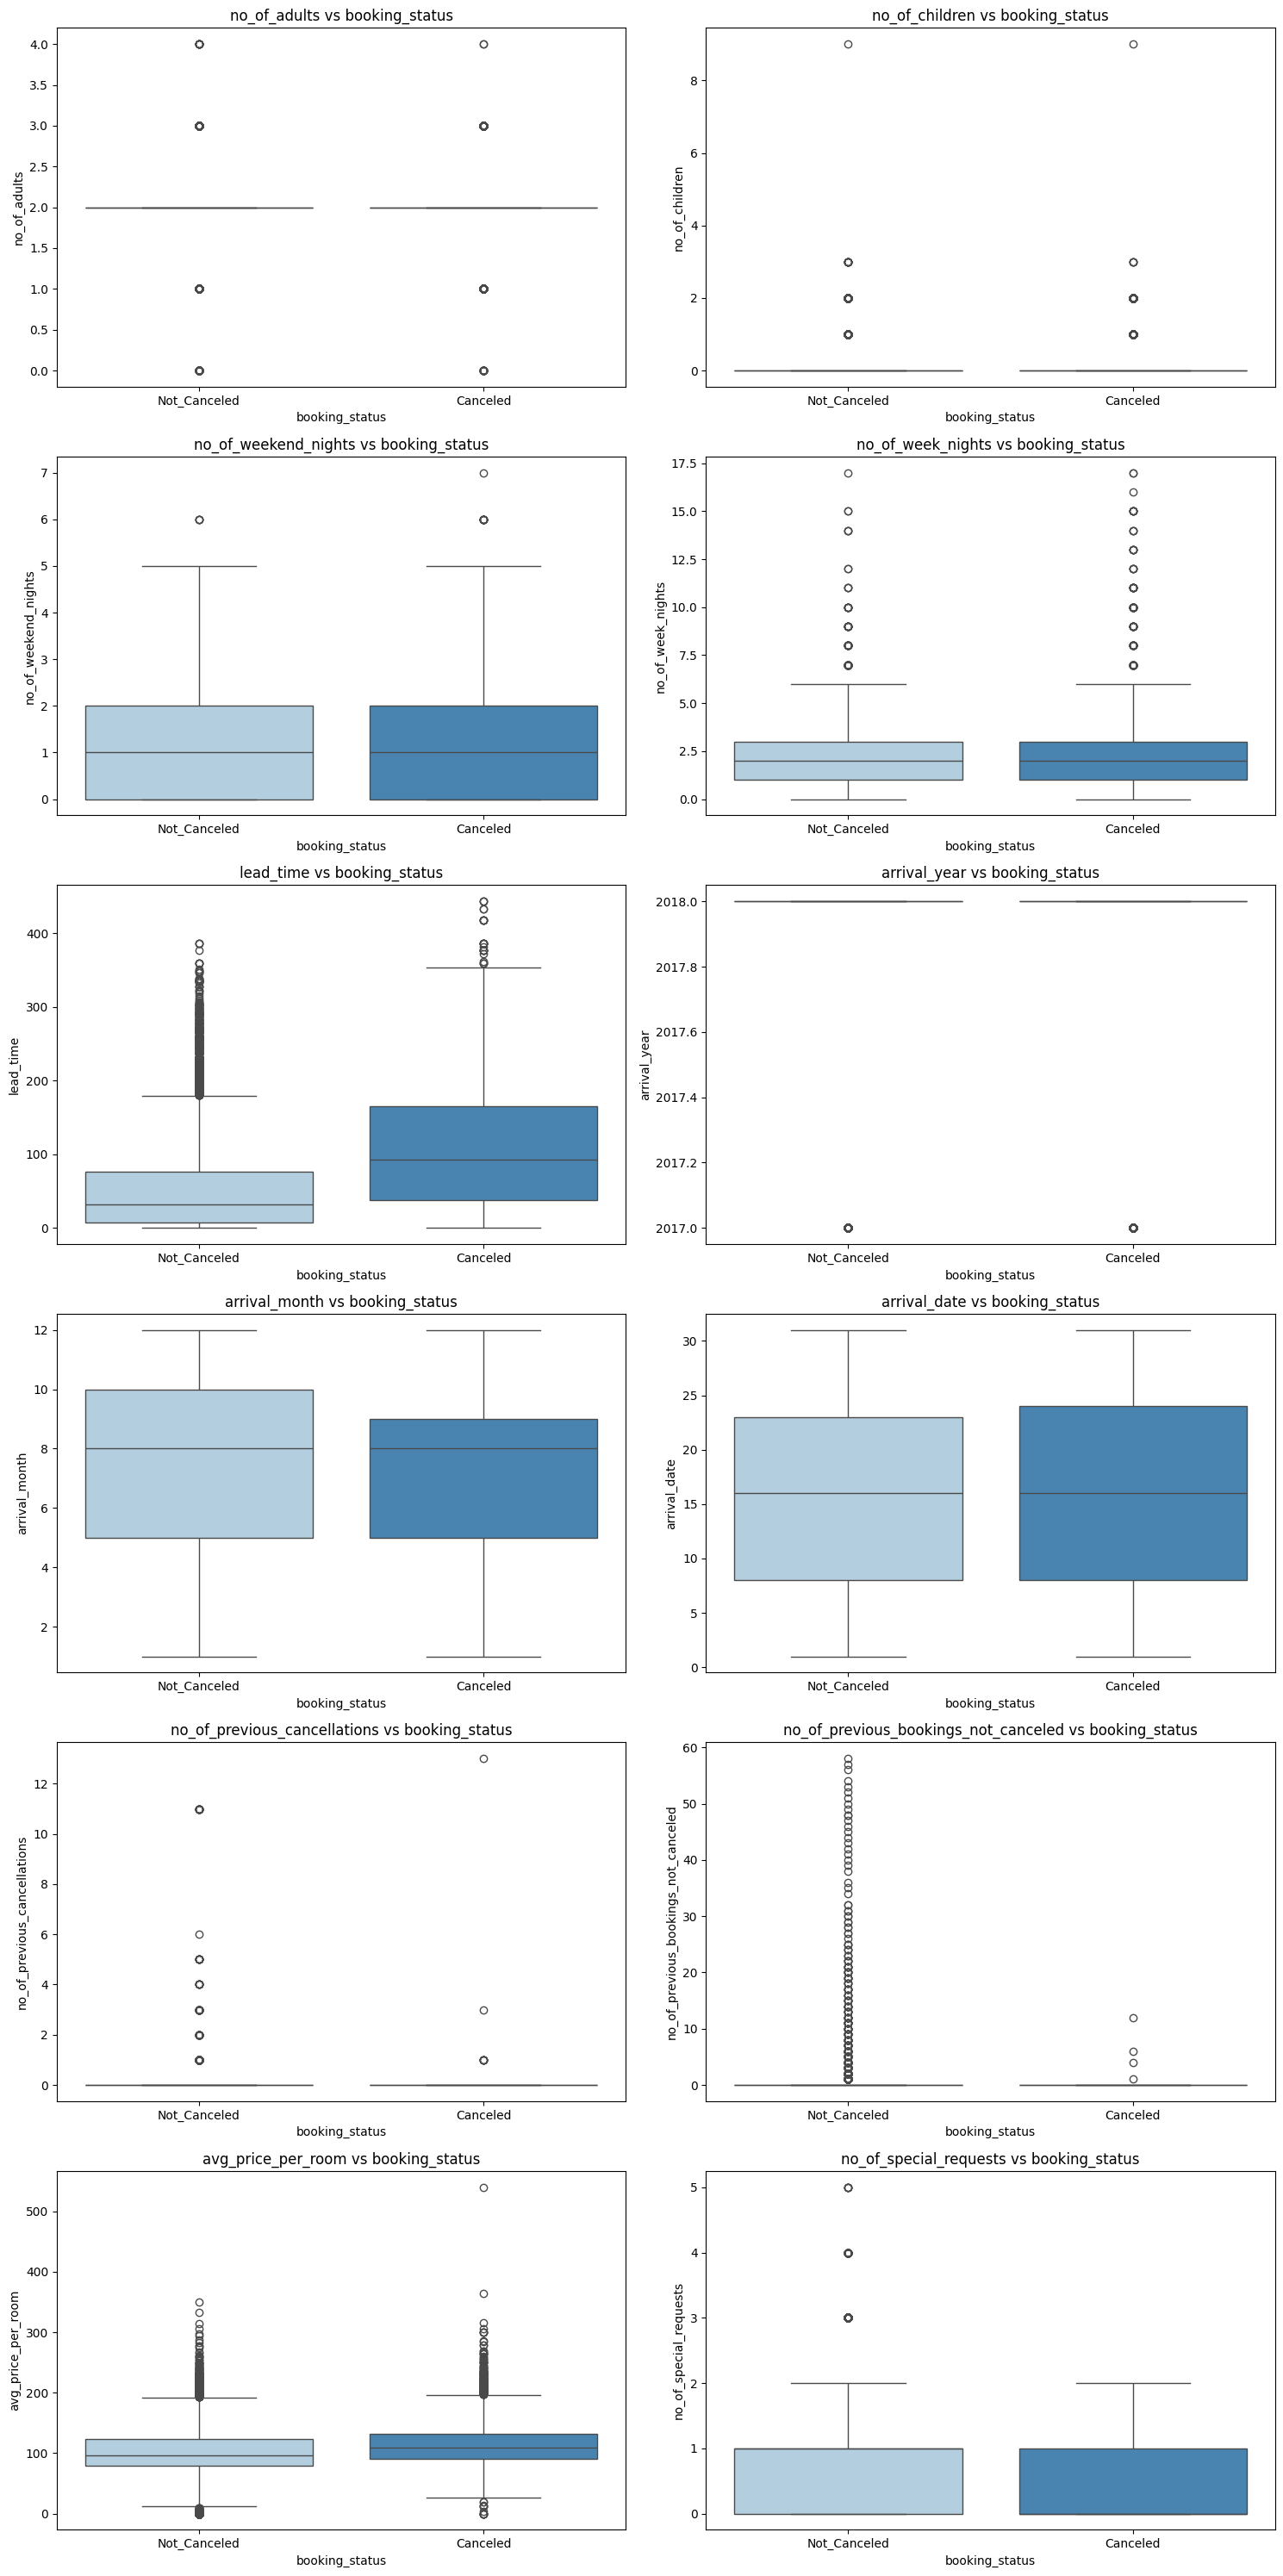

In [60]:
plot_bivariate_for_num(data, 'booking_status', num_cols)

In [68]:
def plot_bivariate_for_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features + 1)// 2

    fig, ax = plt.subplots(num_rows, 2, figsize = (15, num_rows*5))
    ax = ax.flatten()

    for i, columns in enumerate(cat_features):
        sns.countplot(x = columns, hue= target, data = df, palette= "Set2", ax = ax[i])
        ax[i].set_title(f'{columns} vs {target}')
        ax[i].tick_params(axis = 'x', rotation = 75)
        plt.tight_layout()
    plt.show()

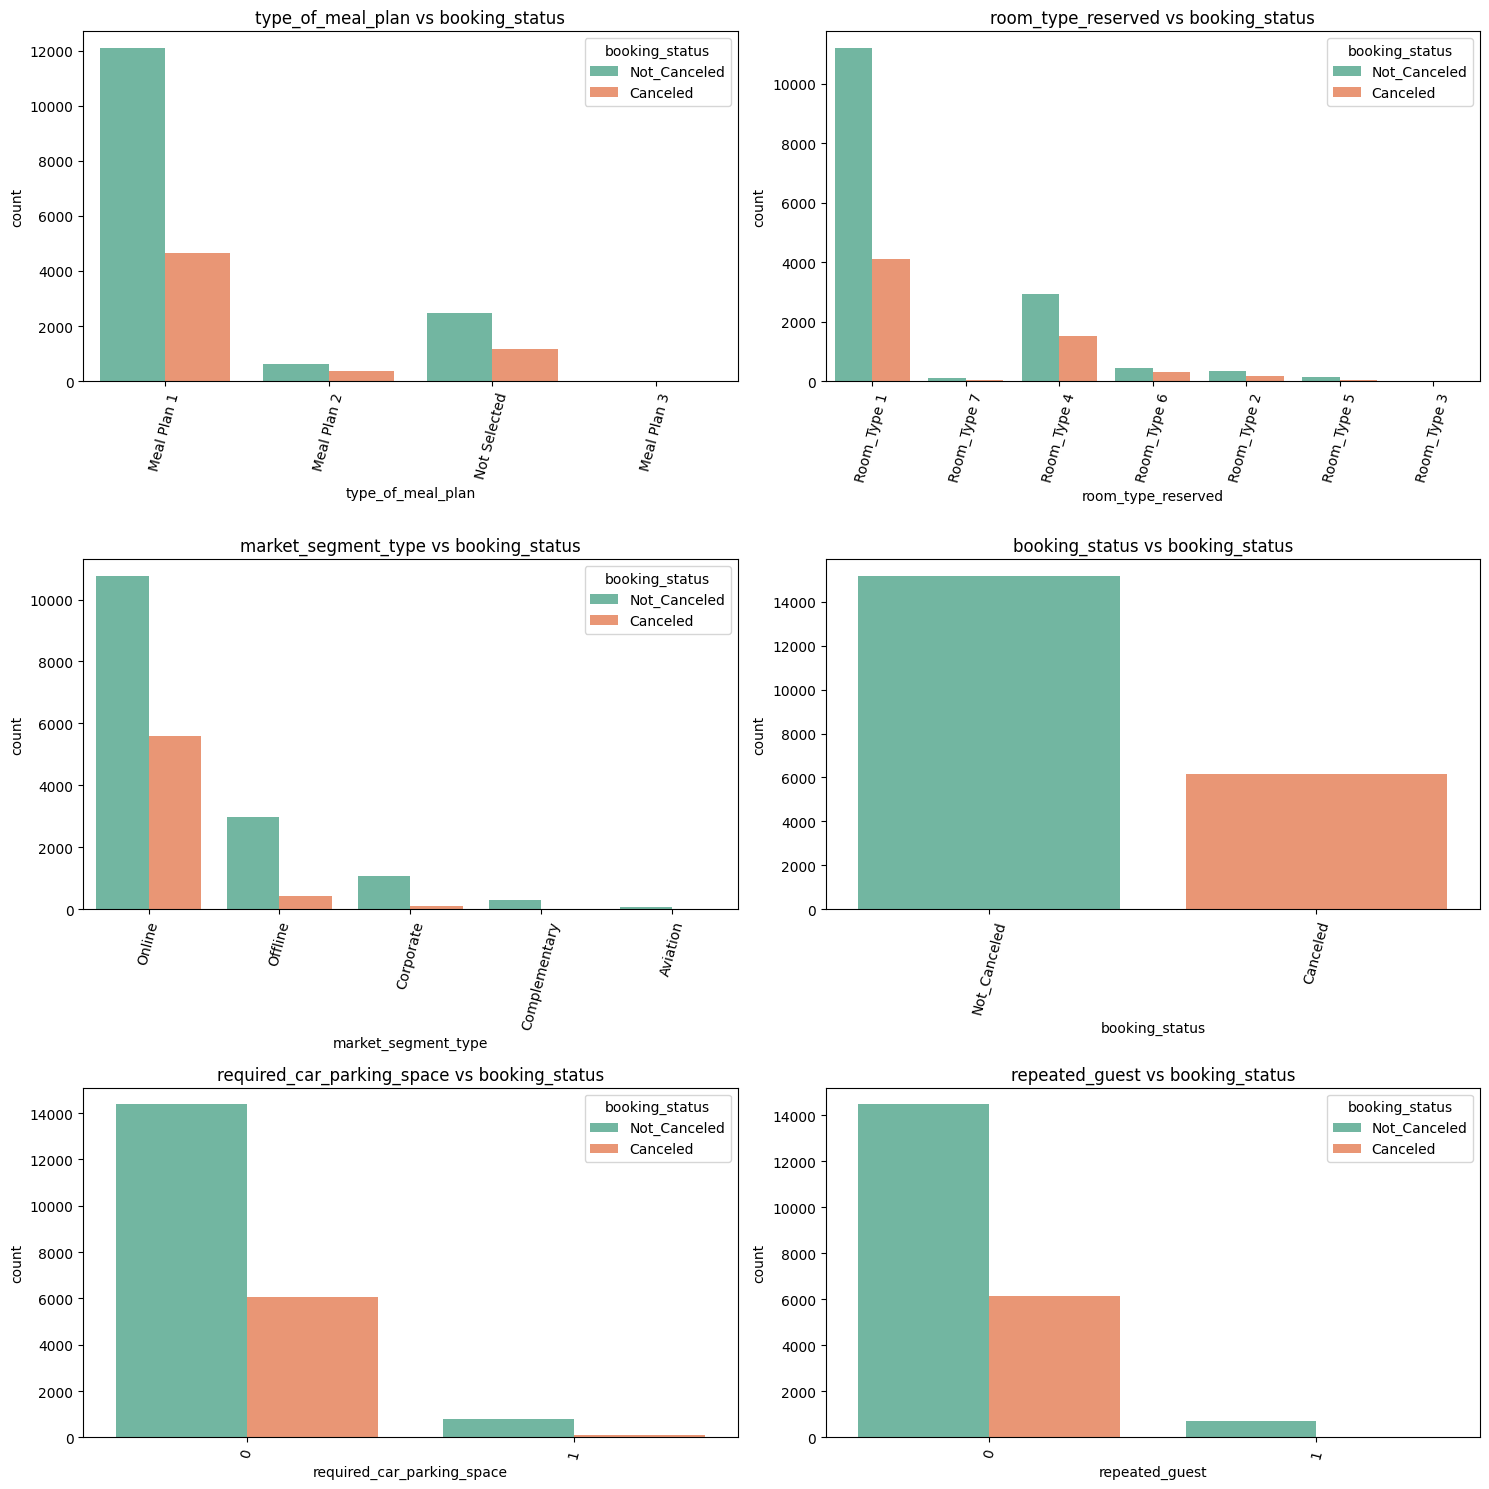

In [70]:
plot_bivariate_for_cat(data, 'booking_status', cat_cols)

# DATA PROCESSING

In [71]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,1,Meal Plan 1,0,Room_Type 1,1,2017,9,1,Online,0,0,0,105.00,0,Not_Canceled
1,2,0,0,2,Meal Plan 2,0,Room_Type 1,74,2017,9,18,Offline,0,0,0,101.50,0,Not_Canceled
2,2,0,0,1,Meal Plan 1,0,Room_Type 1,42,2018,9,15,Online,0,0,0,112.59,1,Not_Canceled
3,2,0,1,0,Meal Plan 1,0,Room_Type 1,13,2018,3,20,Offline,0,0,0,85.00,0,Not_Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,27,2018,2,6,Online,0,0,0,75.00,0,Canceled


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21335 entries, 0 to 29018
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21335 non-null  int64  
 1   no_of_children                        21335 non-null  int64  
 2   no_of_weekend_nights                  21335 non-null  int64  
 3   no_of_week_nights                     21335 non-null  int64  
 4   type_of_meal_plan                     21335 non-null  object 
 5   required_car_parking_space            21335 non-null  int64  
 6   room_type_reserved                    21335 non-null  object 
 7   lead_time                             21335 non-null  int64  
 8   arrival_year                          21335 non-null  int64  
 9   arrival_month                         21335 non-null  int64  
 10  arrival_date                          21335 non-null  int64  
 11  market_segment_type 

In [73]:
## Label Encoding

from sklearn.preprocessing import LabelEncoder

In [76]:
lb = LabelEncoder()

mappings= {}

for column in df.select_dtypes('object').columns:
    df[column] = lb.fit_transform(df[column])

    mappings[column] = {label:code for label, code in zip(lb.classes_, lb.transform(lb.classes_))}

In [77]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [78]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,1,0,0,0,1,2017,9,1,4,0,0,0,105.00,0,1
1,2,0,0,2,1,0,0,74,2017,9,18,3,0,0,0,101.50,0,1
2,2,0,0,1,0,0,0,42,2018,9,15,4,0,0,0,112.59,1,1
3,2,0,1,0,0,0,0,13,2018,3,20,3,0,0,0,85.00,0,1
4,2,0,1,1,3,0,0,27,2018,2,6,4,0,0,0,75.00,0,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21335 entries, 0 to 29018
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21335 non-null  int64  
 1   no_of_children                        21335 non-null  int64  
 2   no_of_weekend_nights                  21335 non-null  int64  
 3   no_of_week_nights                     21335 non-null  int64  
 4   type_of_meal_plan                     21335 non-null  int64  
 5   required_car_parking_space            21335 non-null  int64  
 6   room_type_reserved                    21335 non-null  int64  
 7   lead_time                             21335 non-null  int64  
 8   arrival_year                          21335 non-null  int64  
 9   arrival_month                         21335 non-null  int64  
 10  arrival_date                          21335 non-null  int64  
 11  market_segment_type 

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [100]:
x =add_constant(df)

vif_data = pd.DataFrame()

vif_data['features'] = x.columns
vif_data['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]

In [101]:
vif_data

,features,vif
0,const,4.096509e+07
1,no_of_adults,1.338021e+00
2,no_of_children,1.281912e+00
3,no_of_weekend_nights,1.079395e+00
4,no_of_week_nights,1.129014e+00
5,type_of_meal_plan,1.175469e+00
6,required_car_parking_space,1.033163e+00
7,room_type_reserved,1.550887e+00
8,lead_time,1.408611e+00
9,arrival_year,1.290208e+00


### No multicolleneatiry

<Axes: >

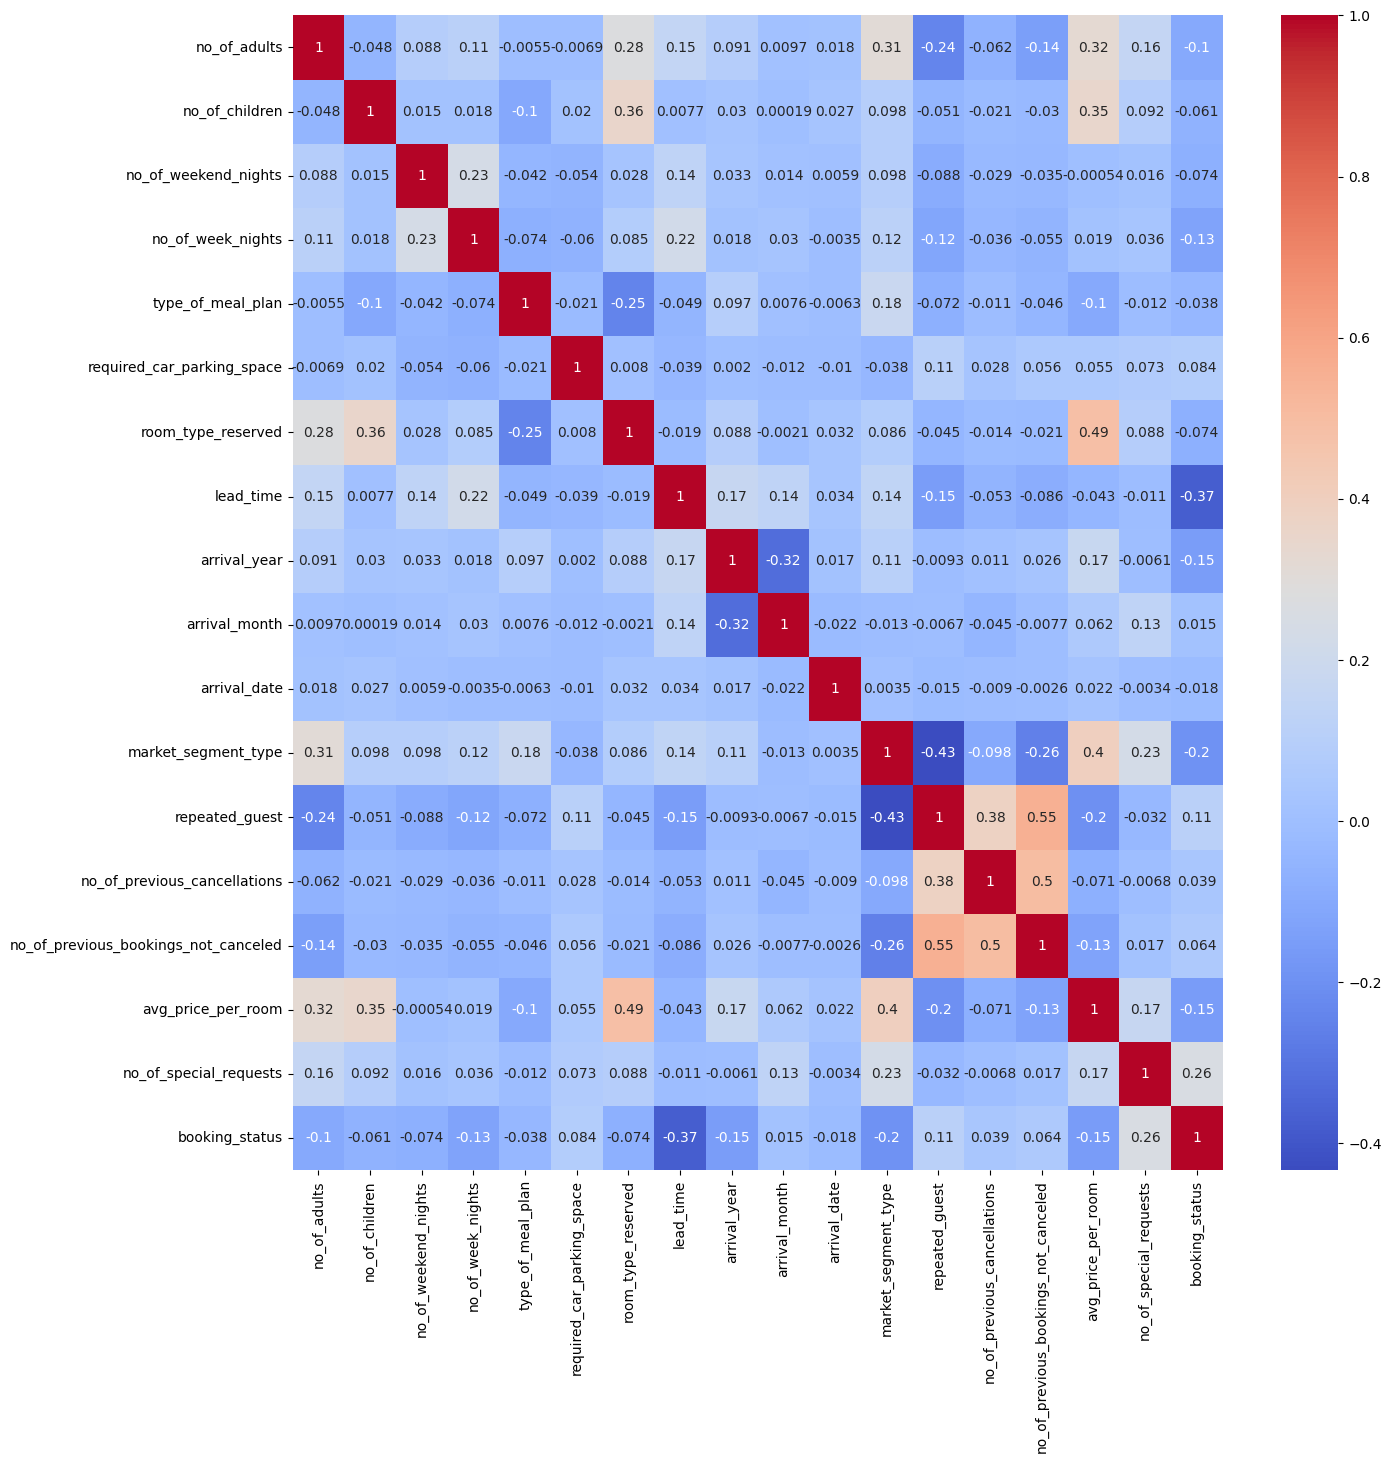

In [108]:
corr = df.corr()
plt.figure(figsize= [15,15])
sns.heatmap(corr, annot= True, cmap= 'coolwarm',)

In [109]:
## Skewness check

skewness= df.skew()
skewness

no_of_adults                            -0.285164
no_of_children                           3.843373
no_of_weekend_nights                     0.669504
no_of_week_nights                        1.618189
type_of_meal_plan                        1.653860
required_car_parking_space               4.593401
room_type_reserved                       1.374272
lead_time                                1.420638
arrival_year                            -1.948869
arrival_month                           -0.292417
arrival_date                             0.011995
market_segment_type                     -2.360421
repeated_guest                           5.229088
no_of_previous_cancellations            21.640563
no_of_previous_bookings_not_canceled    16.171857
avg_price_per_room                       0.588948
no_of_special_requests                   0.927300
booking_status                          -0.930974
dtype: float64

In [110]:
for columns in df.columns:
    if skewness[columns] > 5:
        df[columns] = np.log1p(df[columns])

In [111]:

skewness= df.skew()
skewness

no_of_adults                            -0.285164
no_of_children                           3.843373
no_of_weekend_nights                     0.669504
no_of_week_nights                        1.618189
type_of_meal_plan                        1.653860
required_car_parking_space               4.593401
room_type_reserved                       1.374272
lead_time                                1.420638
arrival_year                            -1.948869
arrival_month                           -0.292417
arrival_date                             0.011995
market_segment_type                     -2.360421
repeated_guest                           5.229088
no_of_previous_cancellations            13.138426
no_of_previous_bookings_not_canceled     7.596134
avg_price_per_room                       0.588948
no_of_special_requests                   0.927300
booking_status                          -0.930974
dtype: float64

In [113]:
### Handiling imbalance
df['booking_status'].value_counts(normalize= True)

booking_status
1    0.710991
0    0.289009
Name: proportion, dtype: float64

In [114]:
x = df.drop('booking_status', axis =1)
y = df['booking_status']

In [116]:
y.value_counts(normalize= True)

booking_status
1    0.710991
0    0.289009
Name: proportion, dtype: float64

In [117]:
from imblearn.over_sampling import SMOTE

In [118]:
smote = SMOTE(random_state= 42)

x_res, y_res = smote.fit_resample(x,y)

In [119]:
y_res.value_counts()

booking_status
1    15169
0    15169
Name: count, dtype: int64

In [120]:
balanced_df = pd.DataFrame(x_res, columns= x.columns)
balanced_df['booking_status'] = y_res

In [121]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,1,0,0,0,1,2017,9,1,4,0.0,0.0,0.0,105.00,0,1
1,2,0,0,2,1,0,0,74,2017,9,18,3,0.0,0.0,0.0,101.50,0,1
2,2,0,0,1,0,0,0,42,2018,9,15,4,0.0,0.0,0.0,112.59,1,1
3,2,0,1,0,0,0,0,13,2018,3,20,3,0.0,0.0,0.0,85.00,0,1
4,2,0,1,1,3,0,0,27,2018,2,6,4,0.0,0.0,0.0,75.00,0,0


In [122]:
balanced_df.shape

(30338, 18)

In [124]:
df = balanced_df.copy()

In [125]:
df.shape

(30338, 18)

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
x = df.drop('booking_status', axis =1)
y = df['booking_status']

In [128]:
model = RandomForestClassifier(random_state= 42)
model.fit(x,y)

RandomForestClassifier(random_state=42)

In [129]:
feature_imporatnce = model.feature_importances_

In [130]:
feature_imporatnce_df = pd.DataFrame({"features": x.columns, "importance": feature_imporatnce })

In [131]:
feature_imporatnce_df.head()

,features,importance
0,no_of_adults,0.018062
1,no_of_children,0.007177
2,no_of_weekend_nights,0.029525
3,no_of_week_nights,0.045049
4,type_of_meal_plan,0.021212


In [133]:
top_important_feature = feature_imporatnce_df.sort_values(by= 'importance', ascending= False)

In [135]:
top_10_features = top_important_feature['features'].head(10).values
top_10_df = df[top_10_features.tolist() + ['booking_status']]

In [136]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,1,0,105.00,9,1,4,1,0,0,0,1
1,74,0,101.50,9,18,3,2,0,1,0,1
2,42,1,112.59,9,15,4,1,0,0,0,1
3,13,0,85.00,3,20,3,0,1,0,0,1
4,27,0,75.00,2,6,4,1,1,3,0,0


In [137]:
top_10_df.shape

(30338, 11)

In [138]:
df = top_10_df.copy()

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [140]:
x = df.drop('booking_status', axis =1)
y = df['booking_status']

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state= 42)

In [143]:
Classifiers = {
    "Randomforest" : RandomForestClassifier(random_state= 42),
    "LogisticRegression" : LogisticRegression(random_state= 42),
    'GradientBoosting': GradientBoostingClassifier(random_state= 42),
    'svm': SVC(random_state= 42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    "knn": KNeighborsClassifier(),
    "naive bayes": GaussianNB(),
    "Xgboost": XGBClassifier(random_state = 42),
    'adaboost': AdaBoostClassifier(random_state= 42),
    'LGBM': LGBMClassifier(random_state= 42)
}

In [144]:
metrics = {
    "Model" : [],
    "accuracy" :[],
    'Precision': [],
    'Recall': [],
    'F1': []
}

In [146]:
for model_name, Classifier in Classifiers.items():
    Classifier.fit(x_train,y_train)
    pred = Classifier.predict(x_test)

    accuray = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    metrics['Model'].append(model_name)
    metrics['accuracy'].append(accuray)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1'].append(f1)

In [148]:
metrics_df = pd.DataFrame(metrics)
metrics_df.head(10)

,Model,accuracy,Precision,Recall,F1
0,Randomforest,0.885465,0.887356,0.884741,0.886047
1,LogisticRegression,0.772907,0.797585,0.735429,0.765247
2,GradientBoosting,0.840639,0.828248,0.862148,0.844858
3,svm,0.723632,0.733786,0.707597,0.720453
4,Decision Tree,0.831740,0.842602,0.818599,0.830427
5,knn,0.774720,0.836458,0.686640,0.754181
6,naive bayes,0.785102,0.818182,0.736739,0.775327
7,Xgboost,0.868490,0.863871,0.876883,0.870328
8,adaboost,0.811635,0.832348,0.783563,0.807219
9,LGBM,0.862228,0.850949,0.880485,0.865465


#### Training Random forest

In [149]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [158]:
rf = RandomForestClassifier(random_state= 42)

param_dist = {
    'n_estimators': randint(100,500),
    'max_depth': randint(5,50),
    "min_samples_split": randint(2,10),
    'min_samples_leaf': randint(1,5)
}   

In [159]:
random_search = RandomizedSearchCV(
    estimator=  rf,
    param_distributions= param_dist,
    n_iter= 5,
    cv = 5,
    random_state= 42,
    scoring= 'f1'
)

random_search.fit(x, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001EBC056D280>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001EBC056FC50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001EBC056E030>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001EBC056F650>},
                   random_state=42, scoring='f1')

In [160]:
random_search.best_params_

{'max_depth': 43,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 314}

In [164]:
results = pd.DataFrame(random_search.cv_results_)
results = results[['params','mean_test_score']]
results.sort_values('mean_test_score', ascending= False)

,params,mean_test_score
2,"{'max_depth': 43, 'min_samples_leaf': 2, 'min_...",0.878914
1,"{'max_depth': 47, 'min_samples_leaf': 4, 'min_...",0.872646
0,"{'max_depth': 43, 'min_samples_leaf': 4, 'min_...",0.871394
4,"{'max_depth': 40, 'min_samples_leaf': 4, 'min_...",0.871252
3,"{'max_depth': 15, 'min_samples_leaf': 3, 'min_...",0.867035


In [165]:
best_rf_model = random_search.best_estimator_

In [166]:
y_pred = best_rf_model.predict(x_test)

In [167]:
accuray = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

In [169]:
accuray

0.8622280817402769

In [170]:
precision

0.8509493670886076

In [171]:
recall

0.8804846103470858

In [172]:
f1

0.8654650788542002

### SAVE MODEL

In [173]:
import joblib

joblib.dump(best_rf_model, "random_forset.pkl")

['random_forset.pkl']